In [3]:
#load the dataset
import pandas as pd
df=pd.read_csv('finance_and_banking.csv')
df.head()





,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#check the shape of the dataset
df.shape

(6362620, 11)

In [ ]:
# checking overall info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#descriptive statistics of the dataset
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [13]:
# check the type column unique values
df['type'].unique()



array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
# check the type column value counts
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
# check the type column value counts
type = df["type"].value_counts()
type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [25]:
# getting the categories in type column
transaction = type.index
transaction

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object', name='type')

In [26]:
# importing plotly library for visualization
import plotly.express as px
quantity = type.values
quantity
# visualizing the type column categories
px.pie(df, values = quantity, names = transaction,hole = 0.4,title = "Distribution of transaction type")

In [27]:
# Count occurrences of fraudulent and non-fraudulent transactions
fraud_distribution = df["isFraud"].value_counts()

# Compute fraud and non-fraud percentages
fraud_ratio = (fraud_distribution.get(1, 0) / len(df)) * 100
non_fraud_ratio = (fraud_distribution.get(0, 0) / len(df)) * 100

# Display the results
print(f"Fraudulent Transactions: {fraud_ratio:.2f}%")
print(f"Non-Fraudulent Transactions: {non_fraud_ratio:.2f}%")

Fraudulent Transactions: 0.13%
Non-Fraudulent Transactions: 99.87%


In [28]:
# Identify distinct types of fraudulent transactions
fraud_types = df[df["isFraud"] == 1]["type"].drop_duplicates().values
print(f"\n The types of fraudulent transactions are: {list(fraud_types)}")

# Filter fraudulent transactions for specific types
fraud_transfer = df[(df["isFraud"] == 1) & (df["type"] == "TRANSFER")]
fraud_cashout = df[(df["isFraud"] == 1) & (df["type"] == "CASH_OUT")]

# Count and display the number of fraudulent transactions for each type
print(f"\n Number of fraudulent TRANSFER transactions: {len(fraud_transfer)}")
print(f"\n Number of fraudulent CASH_OUT transactions: {len(fraud_cashout)}")


 The types of fraudulent transactions are: ['TRANSFER', 'CASH_OUT']

 Number of fraudulent TRANSFER transactions: 4097

 Number of fraudulent CASH_OUT transactions: 4116


In [29]:
# Import necessary library
import plotly.graph_objects as go

# Count occurrences of fraud and non-fraud cases
fraud_counts = df["isFraud"].value_counts()

# Create a pie chart to visualize the class distribution
fig = go.Figure(data=[go.Pie(labels=["Non-Fraudulent", "Fraudulent"], values=fraud_counts)])

# Display the chart
fig.show()

In [31]:
# Map transaction types to integer values based on their frequency
df.replace({"PAYMENT": 2, "TRANSFER": 4, "CASH_OUT": 1, "DEBIT": 5, "CASH_IN": 3}, inplace=True)

# Selecting relevant features for analysis
X = df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]
y = df[["isFraud"]]

# Apply undersampling to handle class imbalance
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


In [32]:
# Visualizing the balanced dataset
fig = go.Figure(data=[go.Pie(labels=["Non-Fraudulent", "Fraudulent"], values=y_resampled["isFraud"].value_counts())])
fig.show()

In [33]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7, random_state=111)

# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

numeric_features = ["amount", "oldbalanceOrg", "newbalanceOrig"]

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [36]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Initializing models with specified parameters
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", random_state=123),
    "Decision Tree": DecisionTreeClassifier(random_state=123),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel="linear", random_state=123),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=123)
}

# Evaluating models using cross-validation
for model_name, model in models.items():
    accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy").mean()
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

Logistic Regression Test Accuracy: 0.8843
Decision Tree Test Accuracy: 0.9921
KNN Test Accuracy: 0.9907
SVC Test Accuracy: 0.8764
Naive Bayes Test Accuracy: 0.6706
Random Forest Test Accuracy: 0.9928


In [37]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter search space for Random Forest
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [2, 4, 8],
    "min_samples_split": [2, 5, 10],
}

# Instantiate Random Forest classifier
rf_model = RandomForestClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring="accuracy", cv=5)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model and its hyperparameters
optimal_model = grid_search.best_estimator_
optimal_params = grid_search.best_params_

# Display the best parameters
print("Optimal Hyperparameters:", optimal_params)

Optimal Hyperparameters: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 200}


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Make predictions on test data
y_pred = optimal_model.predict(X_test)
y_pred



array([0, 1, 0, ..., 0, 0, 0])

In [40]:
# Model evaluation
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {final_accuracy:.4f}")



Final Test Accuracy: 0.9909


In [41]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2432
           1       0.98      1.00      0.99      2496

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [42]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[2394   38]
 [   7 2489]]


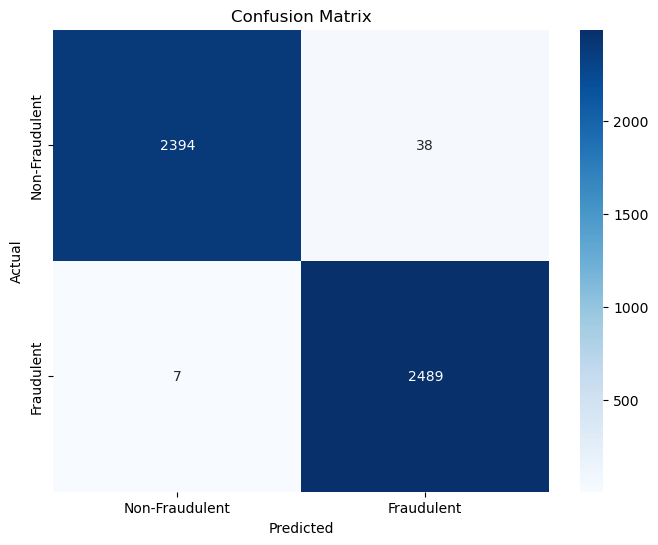

In [44]:
# Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraudulent", "Fraudulent"], yticklabels=["Non-Fraudulent", "Fraudulent"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
# saving the model
import pickle

# Save the trained Random Forest model
with open("fraud_detection_model.pkl", "wb") as model_file:
    pickle.dump(optimal_model, model_file)

# Save the StandardScaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [46]:
# predicting a new transaction from the saved model
import pickle
import pandas as pd
import numpy as np
# Load the saved model and scaler
with open("fraud_detection_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)
with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
# New transaction data
new_transaction = pd.DataFrame({
    "type": ["TRANSFER"],
    "amount": [5000],
    "oldbalanceOrg": [10000],
    "newbalanceOrig": [5000]
})
# Map transaction types to integer values
new_transaction.replace({"PAYMENT": 2, "TRANSFER": 4, "CASH_OUT": 1, "DEBIT": 5, "CASH_IN": 3}, inplace=True)
# Standardize the numerical features
new_transaction[numeric_features] = loaded_scaler.transform(new_transaction[numeric_features])
# Make prediction
prediction = loaded_model.predict(new_transaction)
# Display the prediction result
if prediction[0] == 1:
    print("The transaction is predicted to be fraudulent.")
else:
    print("The transaction is predicted to be non-fraudulent.")


The transaction is predicted to be non-fraudulent.
